In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from IPython import display

from bokeh.io import output_notebook
from bokeh.models import HoverTool
from pandas_summary import DataFrameSummary
from bokeh.io import output_file, show
from bokeh.palettes import Category20c
from bokeh.plotting import figure
from bokeh.transform import cumsum
from bokeh.models.annotations import Title

from math import pi
import warnings

%matplotlib inline
output_notebook()
warnings.filterwarnings('ignore')


Loading BokehJS ...

In [2]:
def to_categorical(dataset):
    
    dataset['category_name'] = dataset['category_name'].astype('category')
    dataset['brand_name'] = dataset['brand_name'].astype('category')
    dataset['item_condition_id'] = dataset['item_condition_id'].astype('category')
    
    return dataset

In [3]:
def visualize_categories_L1(mean_L1):
    
    output_file('categories_mean.html', mode="inline")

    
    mean_L1['angle'] = mean_L1['mean_price_L1']/mean_L1['mean_price_L1'].sum() * 2*pi
    mean_L1['color'] = Category20c[len(mean_L1.category_L1.unique())]
    
    TOOLTIPS = [
        ('', "@category_L1: @mean_price_L1"),
    ]
    
    p = figure(plot_height=350,tooltips=TOOLTIPS)
    p.axis.visible = False
    t = Title()
    t.text = "Mean prices for L1 Categories"
    p.title = t

    p.annular_wedge(x=0, y=1, inner_radius=0.1, outer_radius=0.4,
            start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
            line_color="white", fill_color='color', legend='category_L1', source=mean_L1)



    show(p)

In [4]:
def visualize_subcategories_mean(df,category_L1):
    
    output_file(category_L1+'_subcategories_mean.html', mode="inline")
    
    subset = df.loc[df['category_L1']==category_L1]
    subset['angle'] = subset['price']/subset['price'].sum() * 2*pi
    subset['color'] = Category20c[len(subset.category_L2.unique())]

    TOOLTIPS = [
        ("", "@category_L2: @price"),
    ]


    p = figure(plot_height=450,tooltips=TOOLTIPS)
    p.axis.visible = False
    t = Title()
    t.text = "Mean prices for L2 Categories of category "+category_L1
    p.title = t

    p.annular_wedge(x=0, y=1, inner_radius=0.2, outer_radius=0.4,
            start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
            line_color="white", fill_color='color', legend='category_L2', source=subset)



    show(p)

In [5]:
train = pd.read_csv('data/train.tsv', sep='\t')
test = pd.read_csv('data/test.tsv', sep='\t')

In [6]:
print("In training set, number of rows are: ", train.shape[0],"and number of columns are: ", train.shape[1])

In training set, number of rows are:  1482535 and number of columns are:  8


In [7]:
print("In testing set, number of rows are: ", test.shape[0],"and number of columns are: ", test.shape[1])


In testing set, number of rows are:  693359 and number of columns are:  7


In [8]:
train.head(5)

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [9]:
train.dtypes

train_id               int64
name                  object
item_condition_id      int64
category_name         object
brand_name            object
price                float64
shipping               int64
item_description      object
dtype: object

In [10]:
# converting item_description_id, category name, brand_name to categorical variables
train = to_categorical(train)

In [11]:
train.isnull().mean()*100

train_id              0.000000
name                  0.000000
item_condition_id     0.000000
category_name         0.426769
brand_name           42.675687
price                 0.000000
shipping              0.000000
item_description      0.000270
dtype: float64

In [12]:


# what are the most expensice brands present
# does expensive brand causes higher prices
# how many categories are there
# does the prices vary by product categories


In [13]:
# Q1: What is the overall condition of the products available? 

In [14]:
item_condition_df = pd.DataFrame(train.item_condition_id.value_counts(normalize=True)*100)
item_condition_df

,item_condition_id
1,43.206332
3,29.150138
2,25.326822
4,2.155902
5,0.160806


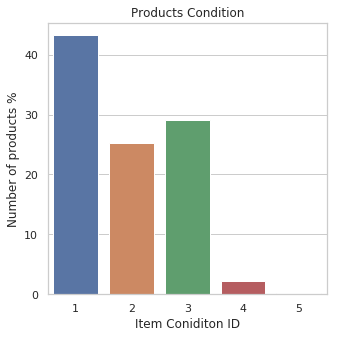

In [15]:
sns.set(style="whitegrid")
plt.subplots(figsize=(5,5))
plt.xlabel = "Item Condition"
plt.ylabel = ""
ax = sns.barplot(x=item_condition_df.index, y=item_condition_df.item_condition_id)
ax.set(xlabel='Item Coniditon ID', ylabel='Number of products %')
ax.set(title="Products Condition")

In [16]:
train.item_description[train.item_condition_id==1][:10]

2     Adorable top with a hint of lace and a key hol...
3     New with tags. Leather horses. Retail for [rm]...
4             Complete with certificate of authenticity
11    (5) new vs pink body mists (2.5 oz each) Fresh...
13                                   No description yet
15    Brand new. Deluxe travel size products. Contai...
16    2 glitter eyeshadows; one in Brass and one in ...
17    Brand new in box Size: Medium Color: Coral Ret...
18    This AUTHENTIC pallete by Too Faced is brand n...
21    NWT Victoria's Secret ULTIMATE SPORT BRA -MAXI...
Name: item_description, dtype: object

In [17]:
train.item_description[train.item_condition_id==5][:10]

258     Powers on, no screen display, no external dama...
653                                    No description yet
1027                 10k gold 18" chain. Broken at clasp.
2436    For parts . Turns on and hold battery charge ....
2803    2 pounds of junk jewelry, There are some items...
3177                                   No description yet
3394                                  For parts or repair
4948         moving out so just dont wanna keep For Free！
5055                      Powers on but won't play games.
5938    Alex and ani rafaelian gold set of four bracel...
Name: item_description, dtype: object

In [18]:
# Q2: Who is responsible for the shipment of prodcuts and how it impacts the product price?

In [19]:
#shipping condition
shipping_df = pd.DataFrame(train.shipping.value_counts(normalize=True)*100)
shipping_df

,shipping
0,55.272557
1,44.727443


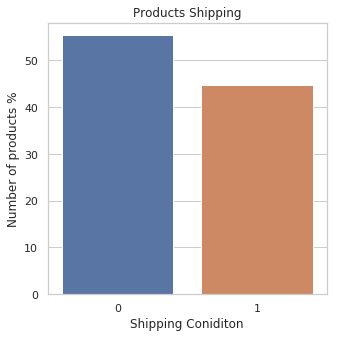

In [20]:
sns.set(style="whitegrid")
plt.subplots(figsize=(5,5))
ax = sns.barplot(x=shipping_df.index, y=shipping_df.shipping)
ax.set(xlabel='Shipping Coniditon', ylabel='Number of products %')
ax.set(title="Products Shipping")

In [21]:
# Q3: How important is the brand name and what are the most frequent brands?

In [22]:
train.brand_name.nunique()

4809

In [23]:
brand_names_list = list(train.brand_name.unique())
brand_names_list[:20]

[nan,
 'Razer',
 'Target',
 'Acacia Swimwear',
 'Soffe',
 'Nike',
 'Smashbox',
 "Victoria's Secret",
 'rue',
 'Scholastic',
 'UGG Australia',
 'Tarte',
 'Wet n Wild',
 'Too Faced',
 'Anthropologie',
 'Torrid',
 'Samsung',
 'FOREVER 21',
 'Air Jordan',
 'Apple']

In [24]:
branded_products = train[train.brand_name.isnull()==False]
non_branded_products = train[train.brand_name.isnull()==True]


In [25]:
branded_products.shape[0]/train.shape[0]*100

57.32431274809701

In [26]:
non_branded_products.shape[0]/train.shape[0]*100

42.675687251902986

In [27]:
branded_products.price.mean()

30.909519646338836

In [28]:
non_branded_products.price.mean()

21.13345329881362

In [29]:
#43 percent values contain NaNs, top brands from remaining 57% data are
train.brand_name.value_counts(normalize=True,dropna=True).nlargest(10)*100

PINK                 6.364395
Nike                 6.359100
Victoria's Secret    5.652272
LuLaRoe              3.650514
Apple                2.038235
FOREVER 21           1.786897
Nintendo             1.765835
Lululemon            1.713002
Michael Kors         1.638872
American Eagle       1.559564
Name: brand_name, dtype: float64

In [30]:
# Q4: What kind of products are popular? 

In [31]:
print("There are %d unique values in the category column." % train['category_name'].nunique())

There are 1287 unique values in the category column.


In [32]:
train['category_name'].value_counts(normalize=True)[:10]*100

Women/Athletic Apparel/Pants, Tights, Leggings                 4.076458
Women/Tops & Blouses/T-Shirts                                  3.141834
Beauty/Makeup/Face                                             2.325892
Beauty/Makeup/Lips                                             2.026137
Electronics/Video Games & Consoles/Games                       1.799001
Beauty/Makeup/Eyes                                             1.708093
Electronics/Cell Phones & Accessories/Cases, Covers & Skins    1.671580
Women/Underwear/Bras                                           1.441125
Women/Tops & Blouses/Tank, Cami                                1.374061
Women/Tops & Blouses/Blouse                                    1.374061
Name: category_name, dtype: float64

In [33]:
train.groupby(train.category_name.str.count("/")).count()


,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
category_name,,,,,,,,
2.0,1471819,1471819,1471819,1471819,844461,1471819,1471819,1471815
3.0,1330,1330,1330,1330,372,1330,1330,1330
4.0,3059,3059,3059,3059,2150,3059,3059,3059


In [34]:
# extract categories
train["category_L1"] = train.category_name.str.extract("([^/]+)/[^/]+/[^/]+", expand=False)
train["category_L2"] = train.category_name.str.extract("[^/]+/([^/]+)/[^/]+", expand=False)
train["category_L3"] = train.category_name.str.extract("[^/]+/[^/]+/([^/]+)", expand=False)

In [35]:
train.category_L1.nunique()

10

In [36]:
category_L1_df = pd.DataFrame(train.category_L1.value_counts(normalize=True,dropna=False)*100)
category_L1_df


,category_L1
Women,44.814119
Beauty,14.018421
Kids,11.580772
Electronics,8.275690
Men,6.318906
Home,4.578037
Vintage & Collectibles,3.138543
Other,3.059017
Handmade,2.080356
Sports & Outdoors,1.709369


In [37]:
train.category_L1.unique()

array(['Men', 'Electronics', 'Women', 'Home', 'Sports & Outdoors',
       'Vintage & Collectibles', 'Beauty', 'Other', 'Kids', nan, 'Handmade'], dtype=object)

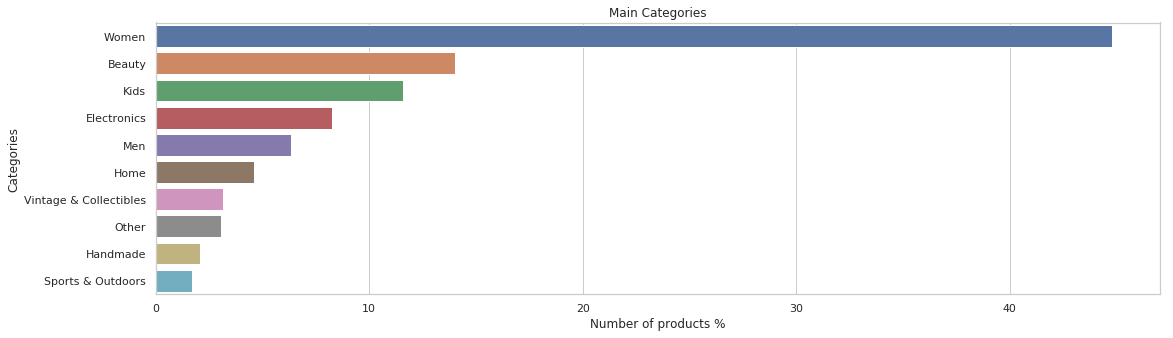

In [38]:
sns.set(style="whitegrid")
plt.subplots(figsize=(18,5))
ax = sns.barplot(y=category_L1_df.index, x=category_L1_df.category_L1)
ax.set(xlabel='Number of products %', ylabel='Categories')
ax.set(title="Main Categories")

In [39]:
train.category_L2.nunique()

113

In [40]:
category_L2_Women_df = pd.DataFrame(train[train.category_L1=="Women"].category_L2.value_counts(normalize=True,dropna=False)*100)
category_L2_Women_df

,category_L2
Athletic Apparel,18.582147
Tops & Blouses,16.099099
Shoes,11.688103
Jewelry,8.554829
Women's Handbags,6.902925
Dresses,6.887272
Women's Accessories,6.374316
Sweaters,5.164475
Underwear,5.085003
Jeans,4.867359


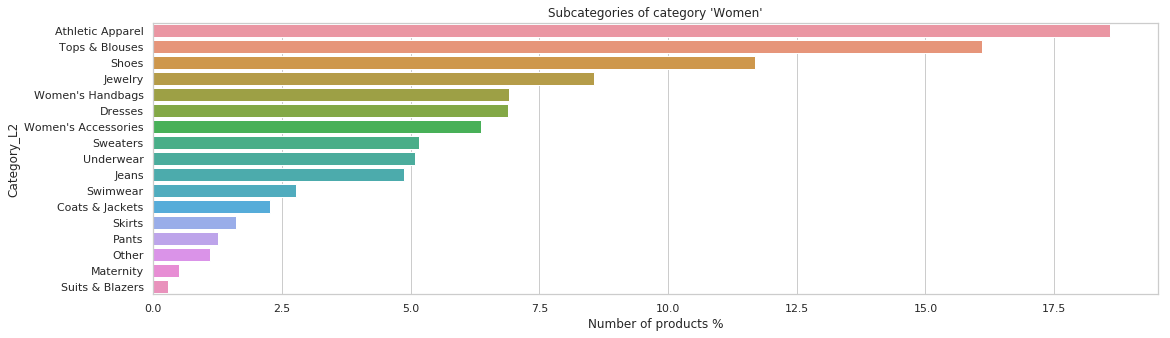

In [41]:
sns.set(style="whitegrid")
plt.subplots(figsize=(18,5))
ax = sns.barplot(y=category_L2_Women_df.index, x=category_L2_Women_df.category_L2)
ax.set(xlabel='Number of products %', ylabel='Category_L2')
ax.set(title="Subcategories of category 'Women'")

In [42]:
train.category_L3.nunique()

870

In [43]:
train.category_L2.value_counts(normalize=True).nlargest(15)*100

Athletic Apparel             9.103256
Makeup                       8.442171
Tops & Blouses               7.245591
Shoes                        6.804732
Jewelry                      4.183895
Toys                         3.939689
Cell Phones & Accessories    3.609925
Women's Handbags             3.106744
Dresses                      3.099699
Women's Accessories          2.868837
Jeans                        2.447487
Video Games & Consoles       2.436716
Sweaters                     2.421881
Underwear                    2.288566
Skin Care                    2.021260
Name: category_L2, dtype: float64

In [44]:
train.category_L3.nunique()

870

In [45]:
# what is the variation in prices
#analyze relationship with price

In [46]:
# its a continuos col
train.price.describe()

count    1.482535e+06
mean     2.673752e+01
std      3.858607e+01
min      0.000000e+00
25%      1.000000e+01
50%      1.700000e+01
75%      2.900000e+01
max      2.009000e+03
Name: price, dtype: float64

In [47]:
train.price.quantile(0.75) 

29.0

In [48]:
train.price.quantile(0.99) 

170.0

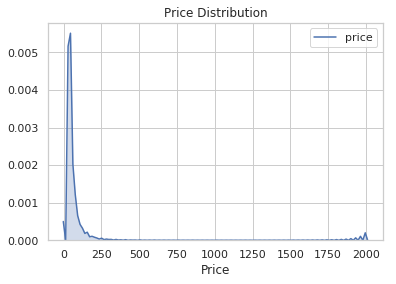

In [49]:
ax = sns.kdeplot(train.price, shade = True)
ax.set(xlabel='Price')
ax.set(title="Price Distribution")
# rightly skewed distribution not uniformly distributed

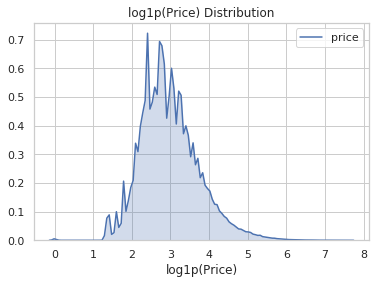

In [50]:
ax = sns.kdeplot(np.log1p(train.price), shade = True)
ax.set(xlabel='log1p(Price)')
ax.set(title="log1p(Price) Distribution")
# need a log distribution to have it uniformly distrubted, it is except right side

In [51]:
# Number of free products
train[train.price==0].shape[0]

874

In [52]:
#346 items out of 874 with no brand name and 13 out of 874 with no category
train[train.price==0].isnull().sum()

train_id               0
name                   0
item_condition_id      0
category_name         13
brand_name           346
price                  0
shipping               0
item_description       0
category_L1           13
category_L2           13
category_L3           13
dtype: int64

In [53]:
# need to check the shipping
# can people share free stuff
train[(train.price==0) & (train.shipping==1)].shape[0]


315

In [54]:
train[(train.price==0) & (train.shipping==1) & (train.item_condition_id==1)].shape[0]

125

In [55]:
# no trend among free products across different category levels was found
train[train.price==0].category_L1.nunique()

10

In [56]:
train[train.price==0].category_L2.nunique()

77

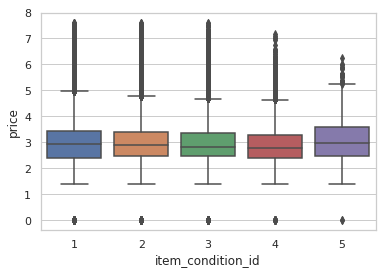

In [57]:
#check the price distributions for condtion 1 and condtion 5
# expcted that condtion 1 mean price is higher as compared to condtion 5
# check if price follows a trend for condtion column
#
sns.boxplot(x = train.item_condition_id, y = np.log1p(train.price), orient = "v")


In [58]:
pd.options.display.max_colwidth=100

In [59]:
train.groupby('shipping').price.mean()


shipping
0    30.111778
1    22.567726
Name: price, dtype: float64

In [60]:
train.groupby(['shipping','item_condition_id']).price.mean()

shipping  item_condition_id
0         1                    33.011762
          2                    29.573047
          3                    28.026705
          4                    25.472504
          5                    33.188852
1         1                    21.416412
          2                    24.294695
          3                    23.701327
          4                    22.006661
          5                    29.067520
Name: price, dtype: float64

In [61]:
seller_shipping= train.loc[train.shipping==1].price
not_seller_shipping = train.loc[train.shipping==0].price

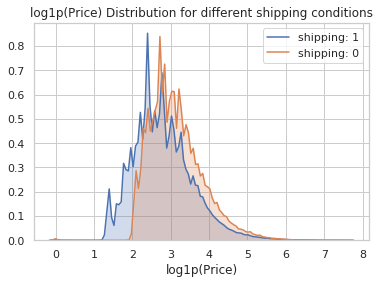

In [62]:
ax = sns.kdeplot(np.log1p(seller_shipping),label="shipping: 1",
                   shade=True, shade_lowest=False)
ax = sns.kdeplot(np.log1p(not_seller_shipping),label="shipping: 0",
                   shade=True, shade_lowest=False)
ax.set(xlabel='log1p(Price)')
ax.set(title="log1p(Price) Distribution for different shipping conditions")

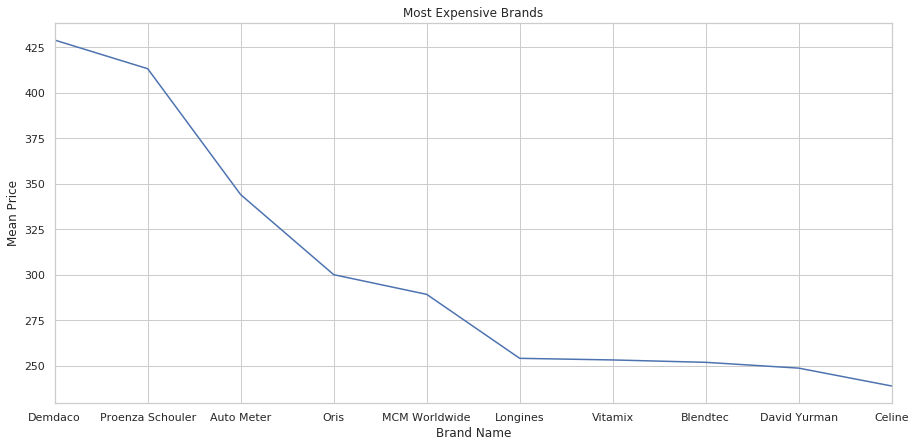

In [63]:
## most expensive brands
fig, ax = plt.subplots(figsize=(15,7))
train.groupby(['brand_name']).mean()['price'].nlargest(10).plot(ax=ax)
ax.set(xlabel='Brand Name', ylabel='Mean Price')
ax.set(title="Most Expensive Brands")

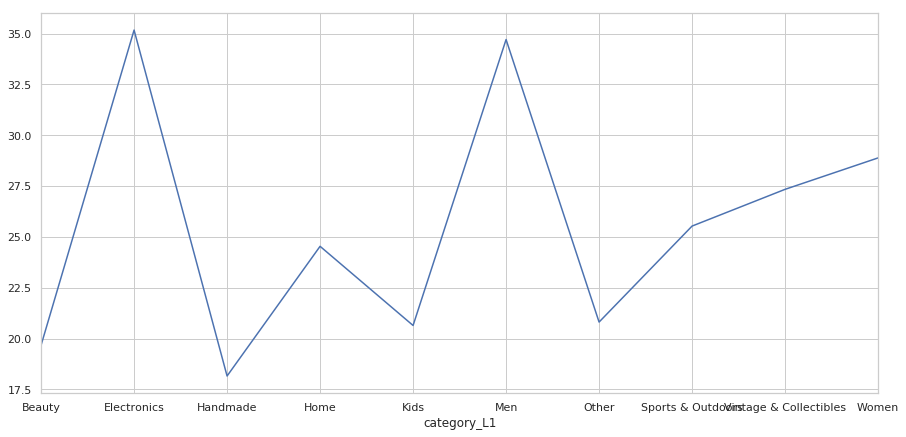

In [64]:
fig, ax = plt.subplots(figsize=(15,7))
train.groupby(['category_L1'])['price'].mean().plot(ax=ax)

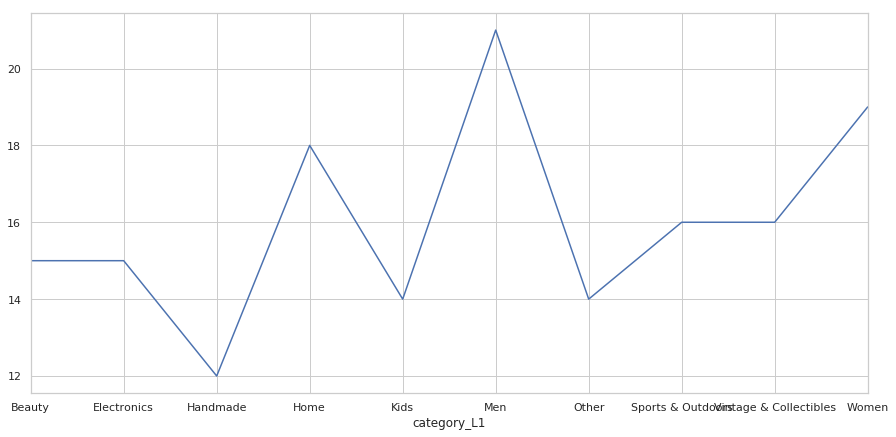

In [65]:
fig, ax = plt.subplots(figsize=(15,7))
train.groupby(['category_L1'])['price'].median().plot(ax=ax)

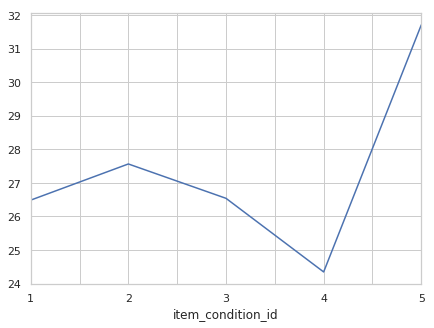

In [66]:
fig, ax = plt.subplots(figsize=(7,5))
train.groupby(['item_condition_id']).mean()['price'].plot(ax=ax)

In [67]:
# What kind of products are more expensive?

In [68]:
mean_L1 = pd.DataFrame(train.groupby(['category_L1']).price.mean())
mean_L1.reset_index(inplace=True)  
mean_L1=mean_L1.rename(columns = {'price':'mean_price_L1'})
mean_L1
mean_L2 = pd.DataFrame(train.groupby(['category_L1', 'category_L2']).price.mean())
mean_L2.reset_index(inplace=True)  

result = pd.merge(mean_L2, mean_L1, on='category_L1')
#result

In [75]:
visualize_categories_L1(mean_L1)

In [76]:
visualize_subcategories_mean(result,"Electronics")

In [77]:
# Are there any free product
free_products = train[train.price==0]
free_products.shape[0]

874

In [72]:
best_free_products = free_products[free_products.item_condition_id==1]
best_free_products.shape[0]

303

In [73]:
best_free_products_shipping = best_free_products[best_free_products.shipping==1]
best_free_products_shipping.shape[0]

125

In [74]:
best_free_products_shipping[best_free_products_shipping.brand_name=='Nike']

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,category_L1,category_L2,category_L3
7116,7116,Nike Dri-Fit High Power Speed Tights,1,"Women/Athletic Apparel/Pants, Tights, Leggings",Nike,0.0,1,"Bought at Nike store in New York, Brand New, Never Worn!",Women,Athletic Apparel,"Pants, Tights, Leggings"
28091,28091,Jordan Cris Shoes Size 2,1,Kids/Boys 0-24 Mos/Shoes,Nike,0.0,1,Bought from another seller and too small,Kids,Boys 0-24 Mos,Shoes
1172410,1172410,BRAND NEW - Men's Nike Tank,1,Men/Athletic Apparel/Shirts & Tops,Nike,0.0,1,Tags still attached- Men's Red Nike cut off tank. FREE SHIPPING,Men,Athletic Apparel,Shirts & Tops
